<a href="https://colab.research.google.com/github/mooglol/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
 for i in range(0,5): 
   prob_drunk_prior = (prob_positive_drunk*prob_drunk_prior)/(prob_positive_drunk*prob_drunk_prior + prob_positive*(1-prob_drunk_prior))
   print(round(prob_drunk_prior, 6))

In [0]:
prob_drunk_given_positive(.001, .08, 1)

0.012358
0.135252
0.6616
0.96069
0.996737


In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-09-19 09:41:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.06s   

2019-09-19 09:41:34 (286 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import scipy.stats
from scipy.stats import ttest_1samp

In [0]:
import pandas as pd

df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

df = df.replace({'?':np.NaN, 'n':0, 'y':1})
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
def confidence_interval(data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [0]:
stats.bayes_mvs(dem['water-project'].dropna(), alpha=.95)

(Mean(statistic=0.502092050209205, minmax=(0.43824514095228484, 0.5659389594661252)),
 Variance(statistic=0.25317353379192964, minmax=(0.2114086380840171, 0.30304303169474467)),
 Std_dev(statistic=0.5026307974956246, minmax=(0.45979195086910457, 0.5504934438253962)))

In [0]:
confidence_interval(dem['water-project'].dropna())

0.06384690925692016


(0.502092050209205, 0.43824514095228484, 0.5659389594661252)

In [0]:
def traditional(prob_positive, prob_false_positive):
  prob_df = []
  for i in range(1,6):
      prob_positive1 = prob_positive - prob_false_positive**(i)
      prob_df.append(prob_positive1)
  return prob_df

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  prob_df = []
  for i in range(0,5): 
   prob_drunk_prior = (prob_positive_drunk*prob_drunk_prior)/(prob_positive_drunk*prob_drunk_prior + prob_positive*(1-prob_drunk_prior))
   prob_df.append(prob_drunk_prior)
  return prob_df

In [0]:
bayesian = prob_drunk_given_positive(.001, .08, 1)
traditional = traditional(1, .08)

In [0]:
bayesian

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734]

In [0]:
traditional

[0.92, 0.9936, 0.999488, 0.99995904, 0.9999967232]

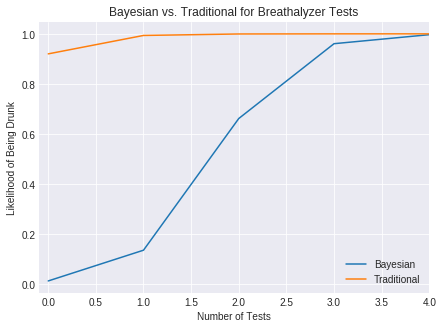

In [0]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(7,5))

ax.plot(bayesian, label='Bayesian')
ax.plot(traditional, label='Traditional')
ax.set_ylabel('Likelihood of Being Drunk')
ax.set_xlabel('Number of Tests')
ax.set_title('Bayesian vs. Traditional for Breathalyzer Tests')
ax.set_xlim(-.1,4)
ax.legend()
plt.show()

I believe that the difference in Bayesian and Traditional is that Bayesian statisticians allow for observed frequencies to be updated or modified with a priori information to better come up with statistical conclusions, where as Traditional does not.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)